In [1]:
# %load_ext lab_black

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
# read in data
df = pd.read_csv("train.csv")

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#rename headers

df = df.rename(columns = {
    "PassengerId": "passenger_id",
    "Survived": "survived",
    "Pclass": "ticket_class",
    "Name": "name",
    "Sex": "sex",
    "Age": "age",
    "SibSp": "siblings_spouses",
    "Parch": "parents_children",
    "Ticket": "ticket_num",
    "Fare": "fare",
    "Cabin": "cabin",
    "Embarked": "embarked_port"
})
# .sort_values(by='fare')

df.head()

,passenger_id,survived,ticket_class,name,sex,age,siblings_spouses,parents_children,ticket_num,fare,cabin,embarked_port
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#count NaNs

df.isna().sum()

passenger_id          0
survived              0
ticket_class          0
name                  0
sex                   0
age                 177
siblings_spouses      0
parents_children      0
ticket_num            0
fare                  0
cabin               687
embarked_port         2
dtype: int64

In [8]:
# Fill cabin NaNs 

pd.set_option('display.max_rows', None)

# Third	E, G
# Second	D, E
# First	A, B, C, D, E

# Deck	# of Rooms
# Boat	6
# A	36
# B	101
# C	134
# D	49
# E	45


conditions = [
    (df['fare'] % 2 == 0) & (df['ticket_class'] == 1),
    (df['fare'] % 2 != 0) & (df['ticket_class'] == 1),
    (df['fare'] % 2 == 0) & (df['ticket_class'] == 2),
    (df['fare'] % 2 != 0) & (df['ticket_class'] == 2),
    (df['fare'] % 2 == 0) & (df['ticket_class'] == 3),
    (df['fare'] % 2 != 0) & (df['ticket_class'] == 3)]
choices = ['C', 'B', 'E', 'D', 'E', 'G']
df['cabin'] = np.select(conditions, choices, default='A')

df



,passenger_id,survived,ticket_class,name,sex,age,siblings_spouses,parents_children,ticket_num,fare,cabin,embarked_port
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,G,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,B,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,G,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,B,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,G,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,G,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,B,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,G,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,G,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,D,C


In [9]:
# df['cabin'] = df['cabin'].str[:1]

In [10]:
# df['cabin']

In [11]:
# Replace NaNs in age with average

# df['age'].mean()
# df['age'].median()

df['age'] = df['age'].fillna(29.7)

df.head()

,passenger_id,survived,ticket_class,name,sex,age,siblings_spouses,parents_children,ticket_num,fare,cabin,embarked_port
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,B,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,B,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S


In [12]:
# Fill in embarked port NaNs randomly

df['embarked_port'] = df['embarked_port'].fillna(method = 'ffill')

In [13]:
#count NaNs

df.isna().sum()

passenger_id        0
survived            0
ticket_class        0
name                0
sex                 0
age                 0
siblings_spouses    0
parents_children    0
ticket_num          0
fare                0
cabin               0
embarked_port       0
dtype: int64

In [14]:
#check outputs 
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:>

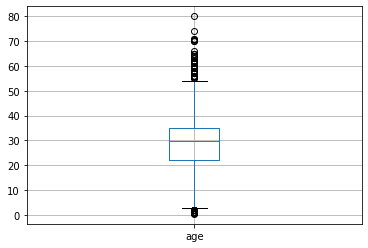

In [15]:
df.boxplot(column = 'age')

In [16]:
# create bins for age

df['age_bucket'] = pd.qcut(df['age'], 5)

In [17]:
df['age_bucket'].value_counts()

(28.0, 29.7]     199
(20.0, 28.0]     183
(0.419, 20.0]    179
(38.0, 80.0]     177
(29.7, 38.0]     153
Name: age_bucket, dtype: int64

In [18]:
# Create plots showing difference in survival rates by age

# ax = df.plot.bar(x='age_bucket', y='survived', rot=0)

# if survived == 0:
#     df.hist(bins=3)


In [19]:
df.head()

,passenger_id,survived,ticket_class,name,sex,age,siblings_spouses,parents_children,ticket_num,fare,cabin,embarked_port,age_bucket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S,"(20.0, 28.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,B,C,"(29.7, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S,"(20.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,B,S,"(29.7, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S,"(29.7, 38.0]"


In [20]:
# Drop unused columns
df = df.drop(['passenger_id', 'name', 'age_bucket', 'ticket_num'], axis = 1)
# df = df.drop(['passenger_id'], axis = 1)
# df = df.drop(['name'], axis = 1)
# df = df.drop(['age_bucket'], axis = 1)

In [21]:
# Reconfigure ticket_class 
df = df.assign(ticket_class=lambda df: df["ticket_class"].replace({1: "First", 2: "Second", 3: "Third"}))

In [22]:
# Set target

target = df["survived"]

y = target
X = df.drop(['survived'], axis=1)

In [23]:
X.columns

Index(['ticket_class', 'sex', 'age', 'siblings_spouses', 'parents_children',
       'fare', 'cabin', 'embarked_port'],
      dtype='object')

In [24]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [25]:
X.columns

Index(['ticket_class', 'sex', 'age', 'siblings_spouses', 'parents_children',
       'fare', 'cabin', 'embarked_port'],
      dtype='object')

In [26]:
# Original - all features - scores 77-79 
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["fare", "age", "siblings_spouses", "parents_children"],),
#         ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class", "sex", "cabin", "embarked_port"]),
#     ]
# )

# V1 - scores 74-82 *best
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["fare", "age"],),
#         ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class", "sex", "cabin"]),
#     ]
# )

# V2 - scores 76-81
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["fare"],),
#         ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class", "sex"]),
#     ]
# )


# V3 - scores 77-80
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["age"],),
#         ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class", "sex", "cabin"]),
#     ]
# )

# V4 - scores 74-81
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["fare", "age", "siblings_spouses"],),
#         ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class", "sex", "cabin"]),
#     ]
# )


# V5 - scores 76-79
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["fare", "age", "parents_children"],),
#         ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class", "sex", "cabin"]),
#     ]
# )


# V6 - scores 77-80
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["age"],),
#         ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class", "sex", "cabin"]),
#     ]
# )

# V6 - scores 76-79
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["age"],),
#         ('"categorical"', OneHotEncoder(drop="first"), ["sex", "cabin"]),
#     ]
# )


# V7 - scores 78-80
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["age"],),
#         ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class", "sex"]),
#     ]
# )


# V7 - scores 74-77
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["age"],),
#         ('"categorical"', OneHotEncoder(drop="first"), ["sex"]),
#     ]
# )

# V8 - scores59-62
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["age"],),
#     ]
# )

# V9 - scores 76-77
# cf = ColumnTransformer(
#     [
#         ('"categorical"', OneHotEncoder(drop="first"), ["sex"]),
#     ]
# )


# V10 - scores 63-67
# cf = ColumnTransformer(
#     [
#         ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class"]),
#     ]
# )


# V11 - scores 64-66
# cf = ColumnTransformer(
#     [
#         ('"categorical"', OneHotEncoder(drop="first"), ["cabin"]),
#     ]
# )


# V12 - 63-66
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["fare"],),
#     ]
# )


# V13 - 61-64
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["siblings_spouses"],),
#     ]
# )


# v14 - 59-61
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["parents_children"],),
#     ]
# )


# V15 - 62
# cf = ColumnTransformer(
#     [
#         ('"categorical"', OneHotEncoder(drop="first"), ["embarked_port"]),
#     ]
# )


# V16 - 76-81
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["fare"],),
#         ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class", "sex", "cabin"]),
#     ]
# )


# V17 - 77
# cf = ColumnTransformer(
#     [
#         ('"categorical"', OneHotEncoder(drop="first"), ["sex", "cabin"]),
#     ]
# )


# V18 - 77
# cf = ColumnTransformer(
#     [
#         ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class", "sex", "cabin"]),
#     ]
# )


# V19 - 77-81
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["fare", "siblings_spouses"],),
#         ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class", "sex", "cabin"]),
#     ]
# )

In [27]:
# Highest Scores

# V19 - 77-81
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["fare", "siblings_spouses"],),
#         ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class", "sex", "cabin"]),
#     ]
# )


# V16 - 76-82
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["fare"],),
#         ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class", "sex", "cabin"]),
#     ]
# )


# V7 - scores 78-80
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["age"],),
#         ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class", "sex"]),
#     ]
# )



# V1 - scores 74-82 *best - random forest
cf = ColumnTransformer(
    [
        ("numerical", "passthrough", ["fare", "age"],),
        ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class", "sex", "cabin"]),
    ]
)



# V4 - scores 74-81
# cf = ColumnTransformer(
#     [
#         ("numerical", "passthrough", ["fare", "age", "siblings_spouses"],),
#         ('"categorical"', OneHotEncoder(drop="first"), ["ticket_class", "sex", "cabin"]),
#     ]
# )



In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [29]:
# Dummy Classifier

d_pipeline = make_pipeline(cf, DummyClassifier())
d_pipeline.fit(X_train, y_train)
y_test_pred_dc = d_pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred_dc))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       137
           1       0.43      0.43      0.43        86

    accuracy                           0.56       223
   macro avg       0.54      0.54      0.54       223
weighted avg       0.56      0.56      0.56       223



C:\Users\bates\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


In [30]:
# accuracy score for Dummy Classifier

accuracy_score(y_test, y_test_pred_dc)

0.5605381165919282

In [31]:
# Logistic Regression Model

lr_pipeline = make_pipeline(cf, LogisticRegression(max_iter=1000))
lr_pipeline.fit(X_train, y_train)
y_test_pred_lr = lr_pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       137
           1       0.70      0.71      0.71        86

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223



In [32]:
# accuracy score for Logistic Regression Model

accuracy_score(y_test, y_test_pred_lr)

0.7713004484304933

In [33]:
# Decision Tree Model (unpruned)

dt_pipeline = make_pipeline(cf, DecisionTreeClassifier())
dt_pipeline.fit(X_train, y_train)
y_test_pred_dt = dt_pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       137
           1       0.69      0.66      0.67        86

    accuracy                           0.75       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.75      0.75      0.75       223



In [34]:
# accuracy score for decision tree model (unpruned)

accuracy_score(y_test, y_test_pred_dt)

0.7533632286995515

In [35]:
# Prune the tree - entropy

dt_pipeline_p2 = make_pipeline(cf, DecisionTreeClassifier(criterion="entropy"))
dt_pipeline_p2.fit(X_train, y_train)
y_test_pred_dt_p2 = dt_pipeline_p2.predict(X_test)
print("Criterion=entropy", classification_report(y_test, y_test_pred_dt_p2))

Criterion=entropy               precision    recall  f1-score   support

           0       0.80      0.77      0.79       137
           1       0.66      0.70      0.68        86

    accuracy                           0.74       223
   macro avg       0.73      0.74      0.73       223
weighted avg       0.75      0.74      0.75       223



In [36]:
# accuracy score for decision tree model using entropy

accuracy_score(y_test, y_test_pred_dt_p2)

0.7443946188340808

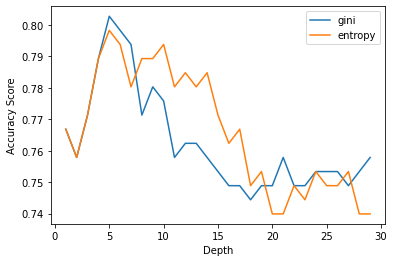

In [37]:
# Prune the tree - loop to find best depth

max_depth_dt = []
acc_gini_dt = []
acc_entropy_dt = []
for i in range(1, 30):
    dt_pipeline_p3 = make_pipeline(
        cf, DecisionTreeClassifier(criterion="gini", max_depth=i)
    )
    dt_pipeline_p3.fit(X_train, y_train)
    pred_g_dt = dt_pipeline_p3.predict(X_test)
    acc_gini_dt.append(accuracy_score(y_test, pred_g_dt))

    dt_pipeline_p4 = make_pipeline(
        cf, DecisionTreeClassifier(criterion="entropy", max_depth=i)
    )
    dt_pipeline_p4.fit(X_train, y_train)
    pred_e_dt = dt_pipeline_p4.predict(X_test)
    acc_entropy_dt.append(accuracy_score(y_test, pred_e_dt))

    max_depth_dt.append(i)

df_dt = pd.DataFrame(
    {
        "acc_gini_dt": pd.Series(acc_gini_dt),
        "acc_entropy_dt": pd.Series(acc_entropy_dt),
        "max_depth_dt": pd.Series(max_depth_dt),
    }
)

# visualizing changes in parameters
plt.plot("max_depth_dt", "acc_gini_dt", data=df_dt, label="gini")
plt.plot("max_depth_dt", "acc_entropy_dt", data=df_dt, label="entropy")
plt.xlabel("Depth")
plt.ylabel("Accuracy Score")
plt.legend()

In [38]:
# Pruned tree 

dt_p_fin = make_pipeline(cf, DecisionTreeClassifier(criterion="gini", max_depth=5))
dt_p_fin.fit(X_train, y_train)
y_test_pred_dt_p_fin = dt_p_fin.predict(X_test)
print("Criterion=gini", classification_report(y_test, y_test_pred_dt_p_fin))

Criterion=gini               precision    recall  f1-score   support

           0       0.78      0.94      0.85       137
           1       0.86      0.58      0.69        86

    accuracy                           0.80       223
   macro avg       0.82      0.76      0.77       223
weighted avg       0.81      0.80      0.79       223



In [39]:
# accuracy score for decision tree model pruned 

accuracy_score(y_test, y_test_pred_dt_p_fin)

0.8026905829596412

In [40]:
# Random Forest Model

rf_pipeline = make_pipeline(cf, RandomForestClassifier(n_estimators=10000))
rf_pipeline.fit(X_train, y_train)
y_test_pred_rf = rf_pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       137
           1       0.79      0.73      0.76        86

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



In [41]:
# accuracy score for random forest model 

accuracy_score(y_test, y_test_pred_rf)

0.820627802690583